# Problem Statement
Data Analytics II 

Create a Linear Regression Model using Python/R to predict home prices using Boston 
Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing 
dataset contains information about various houses in Boston through different 
parameters. There are 506 samples and 14 feature variables in this dataset. 
The objective is to predict the value of prices of the house using the given features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('HousingData.csv')
df.shape

(506, 14)

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

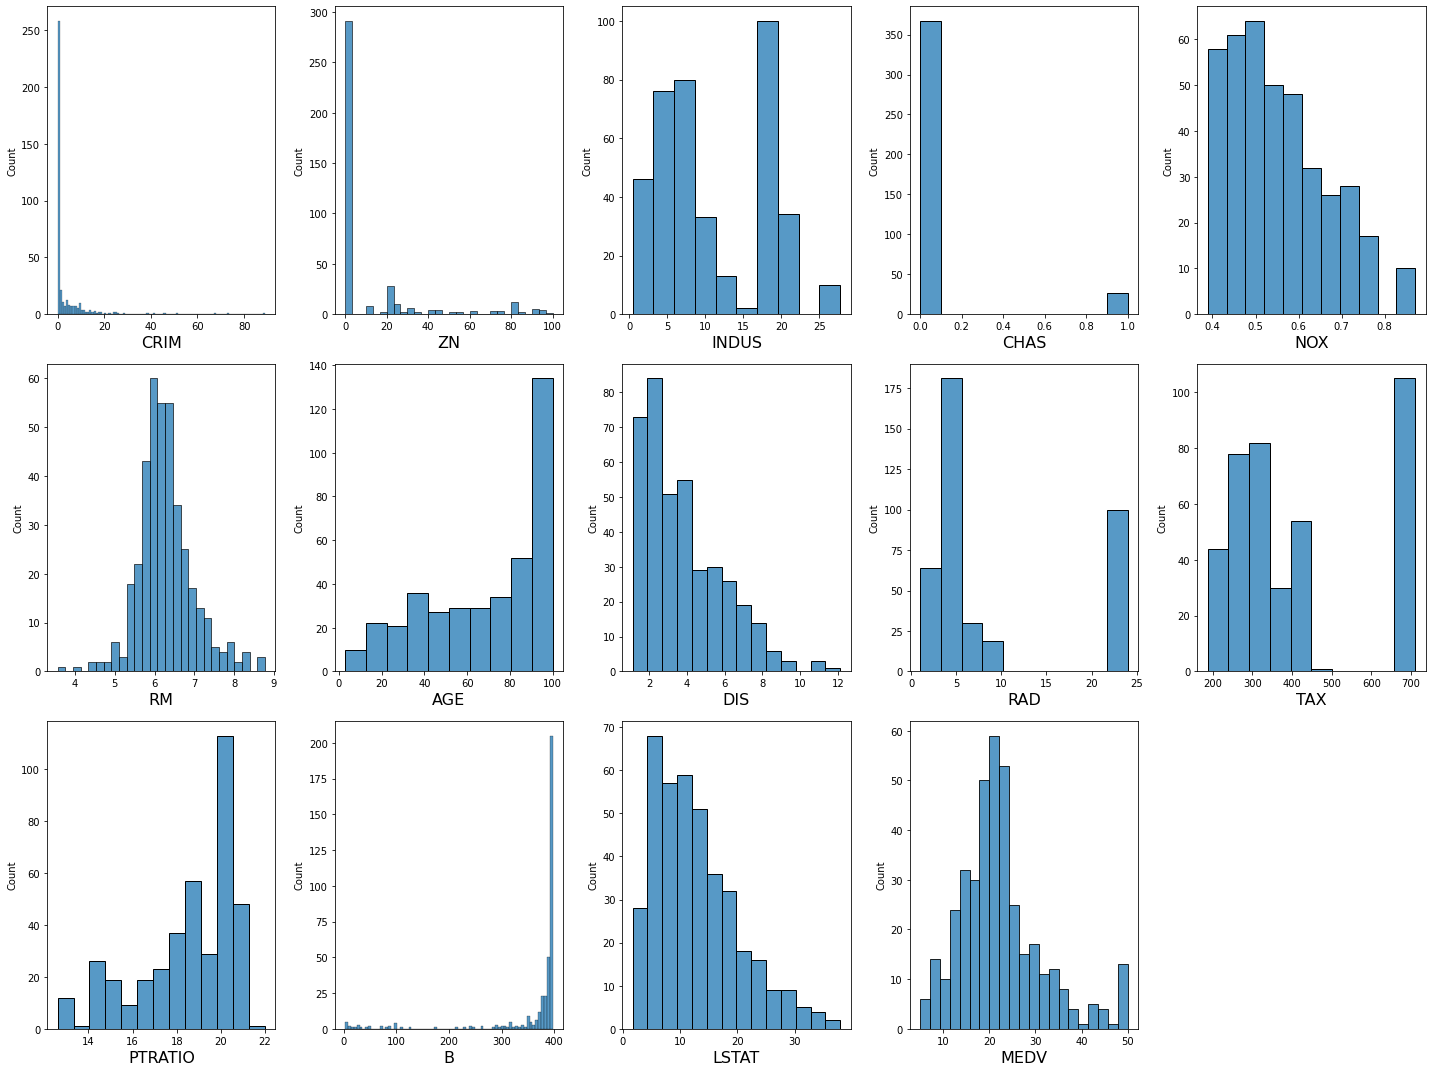

In [7]:
plt.figure(figsize=(20,15))
plotnumber = 1

for col in df:
    ax = plt.subplot(3,5,plotnumber)
    sns.histplot(df[col])
    plt.xlabel(col,fontsize=16)
    plotnumber+=1

plt.tight_layout()
plt.show()

In [8]:
# Finding Co-relation among variables
df.corr(method='pearson').sort_values(by='MEDV',ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,-0.397230,0.406822,-0.510829,0.173701,-0.459054,0.723951,-0.407470,0.279547,-0.416638,-0.508864,-0.543809,0.347256,-0.743450,1.000000
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
B,-0.386254,0.169894,-0.344788,0.068913,-0.384257,0.123320,-0.281990,0.285168,-0.444135,-0.435457,-0.179816,1.000000,-0.383783,0.347256
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054


From above pearson co-relation matrix, we come to know that, {RM, ZN, B, DIS, CHAS} are attributes with highest co-relation coefficient. Hence we will continue with this attributes

In [9]:
# Spearating i/p and o/p columns
x = df[['RM','ZN','B','DIS','CHAS']]
y = df['MEDV']

In [10]:
# Splitting Test-Train Data
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [11]:
# Training Linear Regression Model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)

y_pred = reg.predict(xtest)

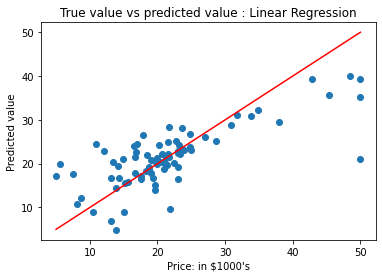

In [12]:
# Regression Model Prediction
plt.scatter(ytest, y_pred)

ideal_values = np.linspace(min(ytest), max(ytest))  
plt.plot(ideal_values, ideal_values, color='red')

plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [13]:
# Comparing Error
from sklearn import metrics

print("MAE :",metrics.mean_absolute_error(ytest,y_pred))
print("MSE :",metrics.mean_squared_error(ytest,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(ytest,y_pred)))

MAE : 4.271277096501591
MSE : 40.41871526708951
RMSE : 6.3575714913077865
